# Business Problem Understanding
- <b>Restaurant owners wants the detailed report on the sales,based on given dataset do the analysis and submit the report

In [83]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

### Load the data

In [84]:
df=pd.read_csv("tips.csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Data Understanding

In [4]:
df.head()    #For first 5 rows

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.tail()    #For last 5 rows

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [30]:
df['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [24]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [31]:
df['smoker'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [32]:
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [27]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [33]:
df['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [28]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [36]:
continous=['total_bill','tip']
discrete=['size']
discrete_categorical=['sex','smoker','day','time']

##### Descriptive statistics 

In [40]:
df[continous].describe()

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


In [41]:
df[continous].skew()

total_bill    1.133213
tip           1.465451
dtype: float64

In [43]:
df[discrete_categorical].describe()

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [45]:
df[discrete].sum()

size    627
dtype: int64

## Data Cleaning 

In [15]:
df.isnull().sum()      #to identify the Null values

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [46]:
df.duplicated().sum()   #to identify the duplicates

1

In [47]:
df.drop_duplicates()    #to drop the duplicates

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Visualization and Analysis

#### Using the Pair-plot,we identify the one variable in the same data row is matched with another

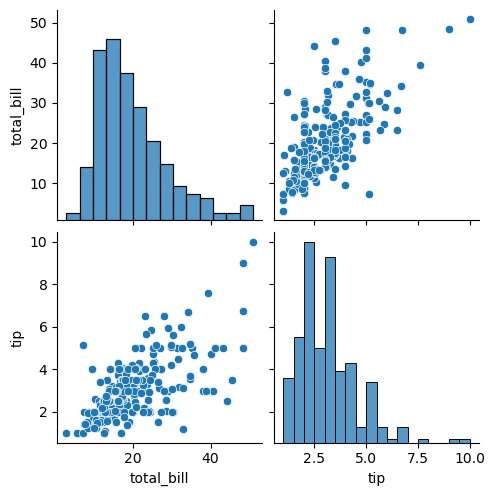

In [51]:
sns.pairplot(df,vars=continous)

#### Using the Heat map it provides the colored cells to represent relation netween variables

In [54]:
heat=df[continous].corr()
heat

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


[]

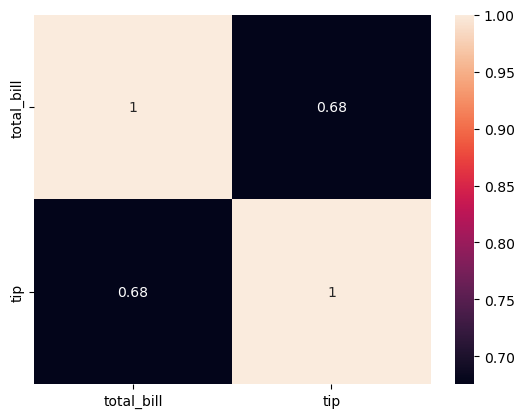

In [60]:
sns.heatmap(heat,annot=True)
plt.plot()

#### Identify the day-wise total bill

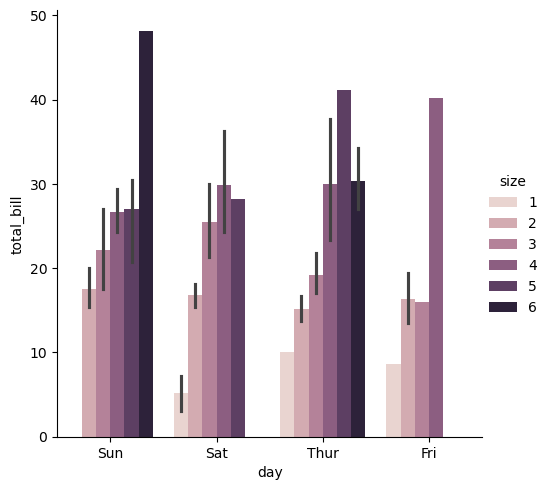

In [68]:
sns.catplot(x='day',y='total_bill',data=df,hue='size',kind='bar')
plt.show()

#### Average bil for day-wise?

In [70]:
df.groupby('time')['total_bill'].sum()

time
Dinner    3660.30
Lunch     1167.47
Name: total_bill, dtype: float64

#### Which time more transactions has done?

In [72]:
df.groupby('time')['total_bill'].mean()

time
Dinner    20.797159
Lunch     17.168676
Name: total_bill, dtype: float64

#### Which time maximum bill amount has done?

In [76]:
pd.crosstab(df['time'],df['sex'],margins=True)

sex,Female,Male,All
time,,,
Dinner,52,124,176
Lunch,35,33,68
All,87,157,244


#### Which day total sales are high?

In [82]:
pd.crosstab(df['day'],df['time'],margins=True)

time,Dinner,Lunch,All
day,,,
Fri,12,7,19
Sat,87,0,87
Sun,76,0,76
Thur,1,61,62
All,176,68,244
